In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime

import ConstructPortfolio as cp #this will allow us to modularize the code!
#using "ConstructPortfolio.py" that is stored in the same directory! 
#(not using "ConstructPortfolio.ipynb")


/Users/bardiafarajnejad/Desktop/1st Half MFE/AFP/Final Delivery/MFE Group 16 AFP Code


# Similar results as trading on A1

In [2]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl')
data.columns.values

array(['tradedate', 'osid', 'symbol', 'coname', 'sector_group', 'max_dt',
       'previoustradedate', 'tickssinceipo', 'alpha', 'stdev_alpha',
       'pricehigh', 'pricelow', 'priceclose', 'priceopen', 'splitfactor',
       'cumsplitfactor', 'volume', 'unadjustedpriceclose', 'pricepctchgd',
       'avgvol50d', 'avgdollarvol50d', 'growthscore', 'growthrank',
       'lastupdatetime', 'epsq1', 'epsq2', 'epsq3', 'epsq4', 'epsq5',
       'epsq6', 'epsq7', 'epsq8', 'epshighq1', 'epshighq2', 'epshighq3',
       'epshighq4', 'epshighq5', 'epshighq6', 'epshighq7', 'epshighq8',
       'epslowq1', 'epslowq2', 'epslowq3', 'epslowq4', 'epslowq5',
       'epslowq6', 'epslowq7', 'epslowq8', 'salesq1', 'salesq2',
       'salesq3', 'salesq4', 'salesq5', 'salesq6', 'salesq7', 'salesq8',
       'saleshighq1', 'saleshighq2', 'saleshighq3', 'saleshighq4',
       'saleshighq5', 'saleshighq6', 'saleshighq7', 'saleshighq8',
       'saleslowq1', 'saleslowq2', 'saleslowq3', 'saleslowq4',
       'saleslowq5', 's

# Analyst Estimate = epshigha1

### Now, let's trade on increases in epshigha1 targets
### the times when 'epshigha1' changes
###### Buy when positive change, so when df['epshigha1'].diff(1) > 0
###### Sell when negative change, so when df['epshigha1'].diff(1) < 0
### with 1 day, 1 week, 2 weeks, 3 weeks, and 4 weeks holding period 
### (AHEAD, not backward... so our ret, ret5d, 10d, 15d, and 20d needs to be forward)
### Thus, we will use ret5d_'lag' !!

# Set buy_tomorrow>0 when df['epshigha1'].diff(1) > 0
# Set Sell_tomorrow>0 when df['epshigha1'].diff(1) < 0


In [3]:
data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['epshigha2'].notna()].reset_index(drop=True).copy()


data['buy_tomorrow'] = np.where(data['epshigha2'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['epshigha2'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'


Total number of Buys:  31379
Total number of Sells:  31835
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]


In [4]:
data = cp.trade_on_valid_lags_only(data)


There are  175  problems for buying

There are  87  problems for selling
Total number of Buys:  31204
Total number of Sells:  31748


# Now we can trade!
### Holding period of 1 week, 2 weeks, 3 weeks, and 4 weeks with equal weighted portfolios!

# First, create daily equal weighted portfolio weights and returns (NOT AT THE WEEKLY frequency because that will mess up the implementation of the portfolio!). Problem is:

##### Think (part 1): 1st signal on Monday- want to buy on Tuesday and hold for 1 week in an equal weighted portfolio
##### Think (part 2): 2nd signal on Thursday- want to buy on Friday and hold for 1 week in an equal weighted portfolio
##### Think (part 3): Will have overlapping portfolio between 1st and 2nd signal on Friday and on Monday

## Then, for 1 week, 2 week, 3 week, and 4 week holding periods, we must do the following:
##### extend "buy_tomorrow" and "sell_tomorrow" forward for 4 more trading days

In [5]:
data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)


There are  450  problems for buying

There are  326  problems for selling
Total number of Buys:  370557
Total number of Sells:  308665

There are  367  problems for buying

There are  262  problems for selling
Total number of Buys:  293996
Total number of Sells:  245421

There are  272  problems for buying

There are  205  problems for selling
Total number of Buys:  211058
Total number of Sells:  177615

There are  195  problems for buying

There are  146  problems for selling
Total number of Buys:  120013
Total number of Sells:  104235

There are  2  problems for buying

There are  2  problems for selling
Total number of Buys:  31180
Total number of Sells:  31731


# First, do 1 day holding period: data_smaller
# Next, do 5 day holding period: data_smaller5
# Next, do 10 day holding period: data_smaller10
# Next, do 15 day holding period: data_smaller15
# Next, do 20 day holding period: data_smaller20



There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.599
Date:                Sat, 04 Dec 2021   Prob (F-statistic):              0.143
Time:                        19:50:42   Log-Likelihood:                 11878.
No. Observations:                5382   AIC:                        -2.374e+04
Df Residuals:                    5375   BIC: 

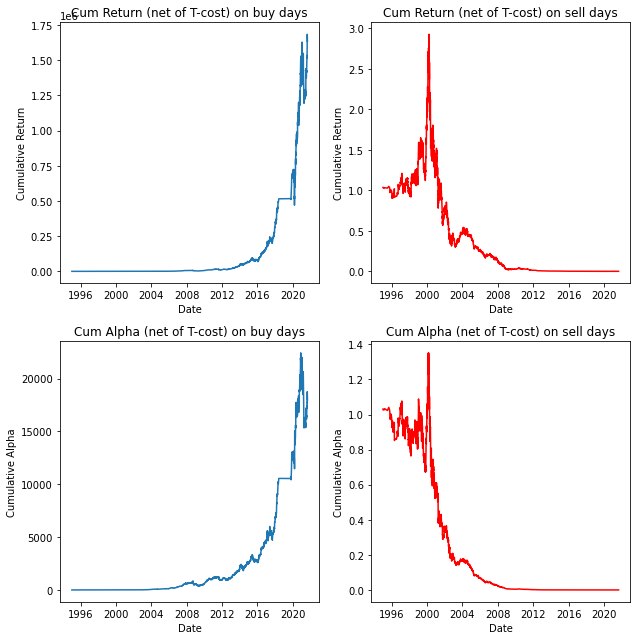

In [6]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  4  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.591
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0165
Time:                        19:51:01   Log-Likelihood:                 15752.
No. Observations:                6074   AIC:                        -3.149e+04
Df Residuals:                    6067   BIC: 

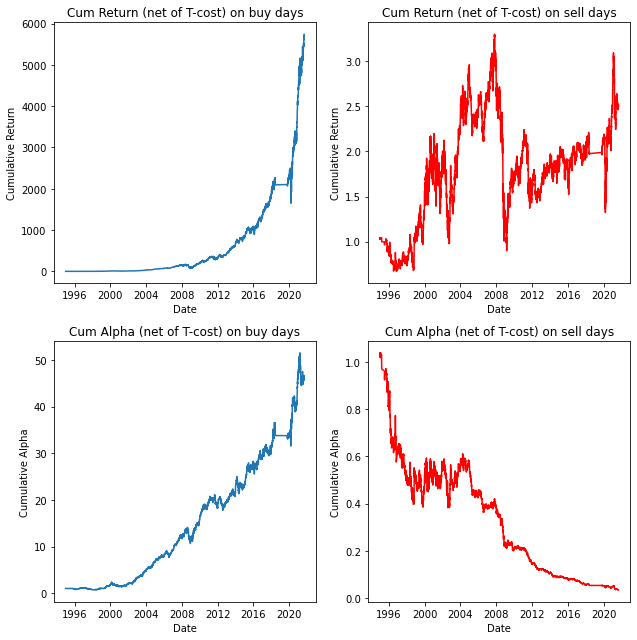

In [7]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  3  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.052
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00554
Time:                        19:51:24   Log-Likelihood:                 16486.
No. Observations:                6219   AIC:                        -3.296e+04
Df Residuals:                    6212   BIC: 

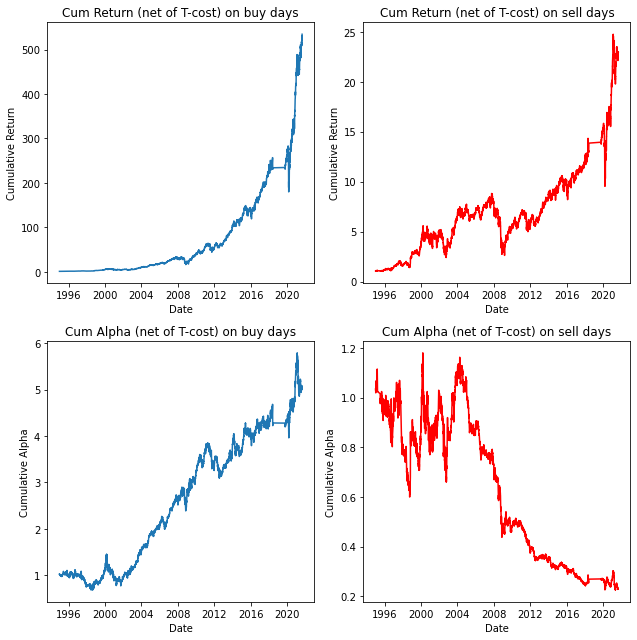

In [8]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.536
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00170
Time:                        19:51:49   Log-Likelihood:                 16792.
No. Observations:                6281   AIC:                        -3.357e+04
Df Residuals:                    6274   BIC: 

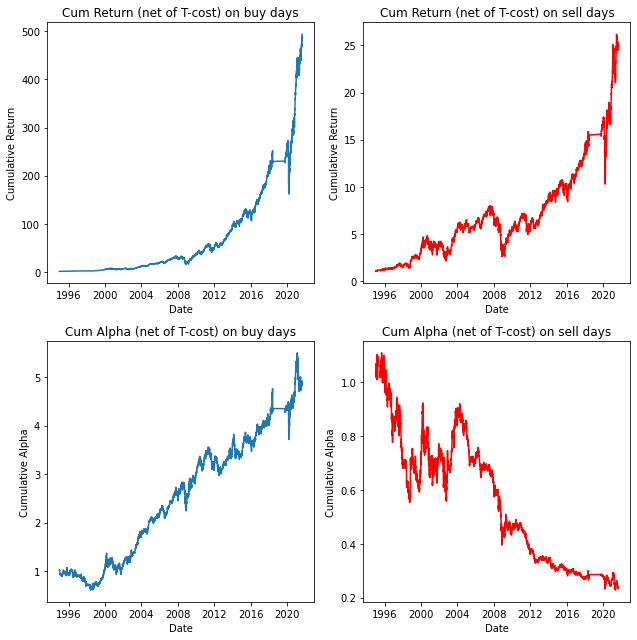

In [9]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.809
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000859
Time:                        19:52:22   Log-Likelihood:                 16974.
No. Observations:                6316   AIC:                        -3.393e+04
Df Residuals:                    6309   BIC: 

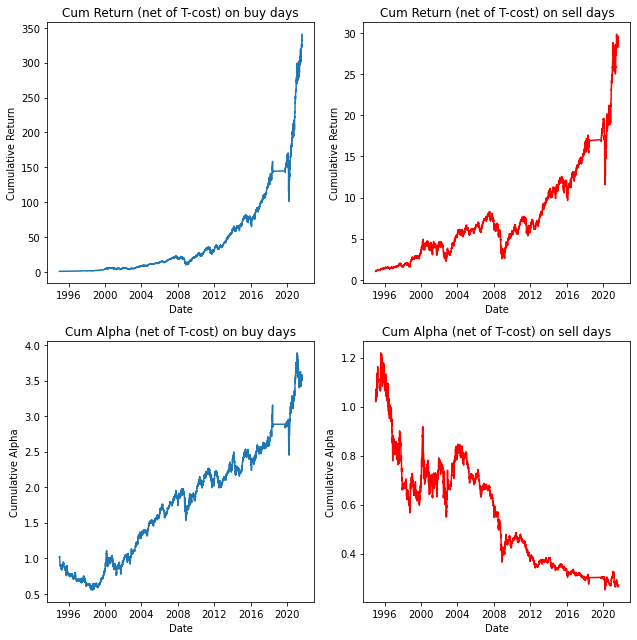

In [10]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now, let's do the same thing but using the epslowa1 estimate!

In [11]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['epslowa2'].notna()].reset_index(drop=True).copy()


data['buy_tomorrow'] = np.where(data['epslowa2'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['epslowa2'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  30524
Total number of Sells:  33228
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  134  problems for buying

There are  138  problems for selling
Total number of Buys:  30390
Total number of Sells:  33090

There are  319  problems for buying

There are  408  problems for selling
Total number of Buys:  355687
Total number of Sells:  326161

There are  274  problems for buying

There are  330  problems for selling
Total number of Buys:  280942
Total number of Sells:  260711

There are  207  problems for buying

There are  253  problems for selling
Total number of Buys:  201094
Total number of Sells:  189614

There are  147  problems for buying

There are  170  problems for selling
Total number of Buys:  114483
Total number of Sells:  111072

There are  2  problems for buying

There are  1  problems for selling
Total number of Buys:  30369
Total number of Sells:  33070



There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.020
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0596
Time:                        19:53:58   Log-Likelihood:                 12101.
No. Observations:                5352   AIC:                        -2.419e+04
Df Residuals:                    5345   BIC: 

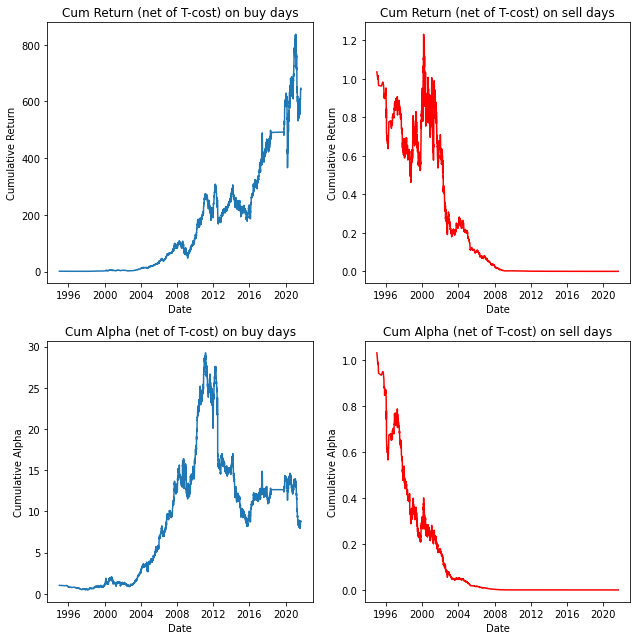

In [12]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  3  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.725
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00106
Time:                        19:54:17   Log-Likelihood:                 15650.
No. Observations:                6059   AIC:                        -3.129e+04
Df Residuals:                    6052   BIC: 

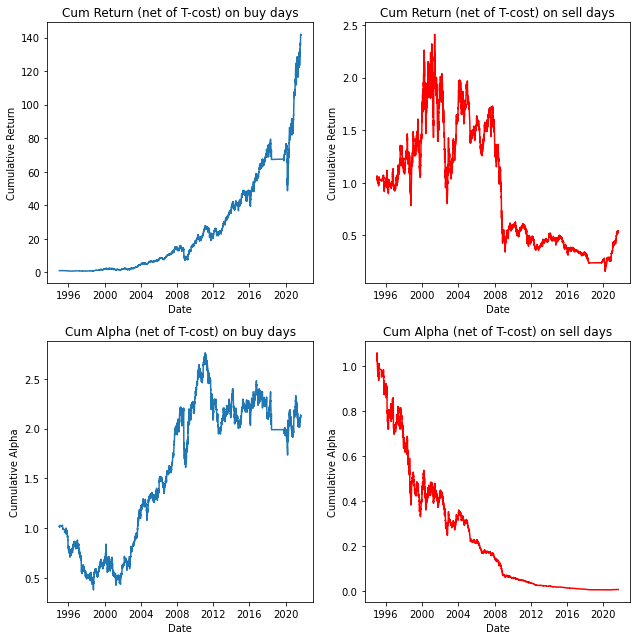

In [13]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.086
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00511
Time:                        19:54:38   Log-Likelihood:                 16338.
No. Observations:                6184   AIC:                        -3.266e+04
Df Residuals:                    6177   BIC: 

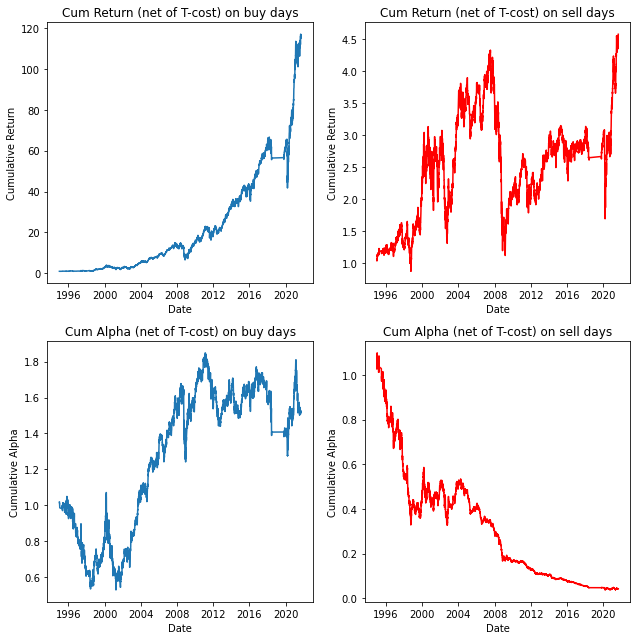

In [14]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  3  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.197
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00391
Time:                        19:55:04   Log-Likelihood:                 16619.
No. Observations:                6227   AIC:                        -3.322e+04
Df Residuals:                    6220   BIC: 

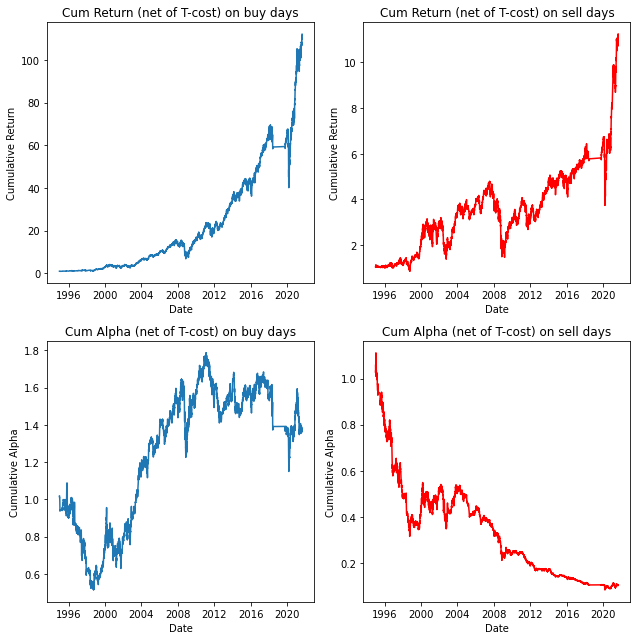

In [15]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.639
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00131
Time:                        19:55:31   Log-Likelihood:                 16795.
No. Observations:                6257   AIC:                        -3.358e+04
Df Residuals:                    6250   BIC: 

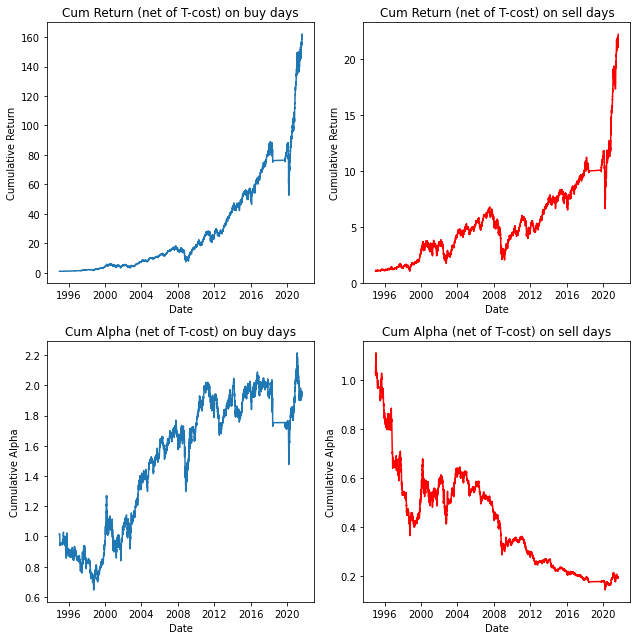

In [16]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now, let's do the same thing but using BOTH epshigha1 & epslowa1 estimate!

In [17]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['epslowa2'].notna()].reset_index(drop=True).copy()
data = data[data['epshigha2'].notna()].reset_index(drop=True).copy()

data['midpoint_eps_estimate'] = (data['epslowa2'] + data['epshigha2']) / 2

data = data[data['midpoint_eps_estimate'].notna()].reset_index(drop=True).copy()

data['buy_tomorrow'] = np.where(data['midpoint_eps_estimate'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['midpoint_eps_estimate'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  41215
Total number of Sells:  43149
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  220  problems for buying

There are  165  problems for selling
Total number of Buys:  40995
Total number of Sells:  42984

There are  578  problems for buying

There are  539  problems for selling
Total number of Buys:  470481
Total number of Sells:  430808

There are  488  problems for buying

There are  438  problems for selling
Total number of Buys:  379168
Total number of Sells:  349622

There are  367  problems for buying

There are  348  problems for selling
Total number of Buys:  276193
Total number of Sells:  257634

There are  266  problems for buying

There are  232  problems for selling
Total number of Buys:  158351
Total number of Sells:  151176

There are  2  problems for buying

There are  3  problems for selling
Total number of Buys:  40968
Total number of Sells:  42957



There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.844
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00913
Time:                        19:57:29   Log-Likelihood:                 12827.
No. Observations:                5590   AIC:                        -2.564e+04
Df Residuals:                    5583   BIC: 

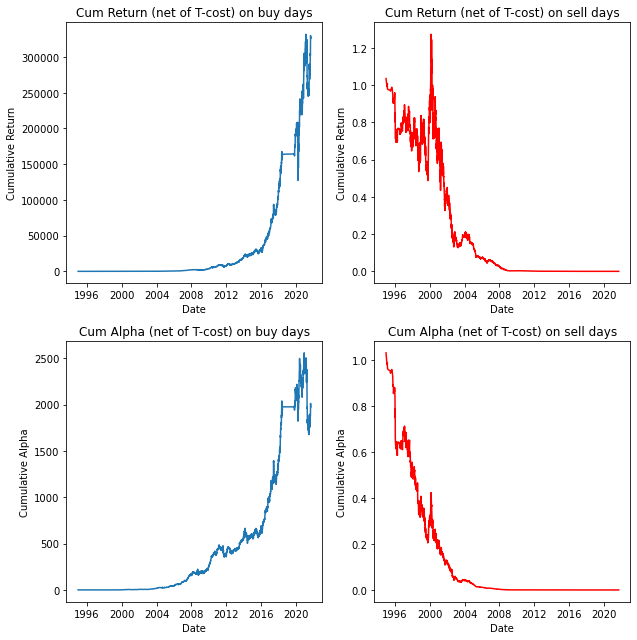

In [18]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.841
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000793
Time:                        19:57:51   Log-Likelihood:                 16048.
No. Observations:                6139   AIC:                        -3.208e+04
Df Residuals:                    6132   BIC: 

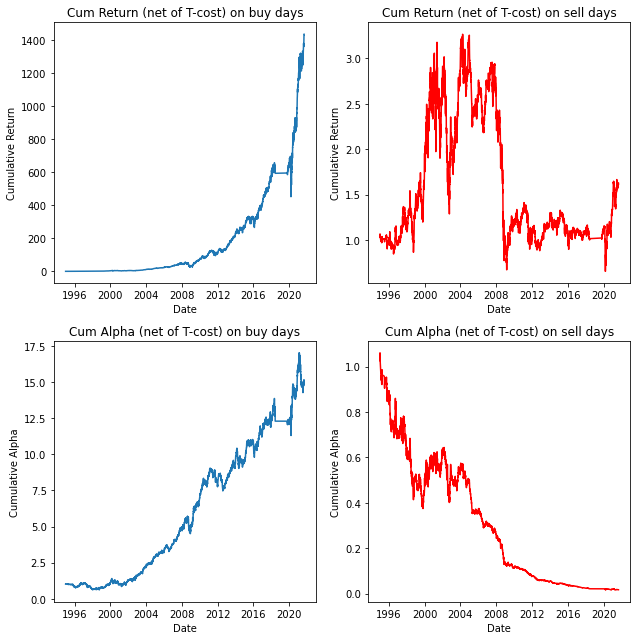

In [19]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.330
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00282
Time:                        19:58:15   Log-Likelihood:                 16608.
No. Observations:                6249   AIC:                        -3.320e+04
Df Residuals:                    6242   BIC: 

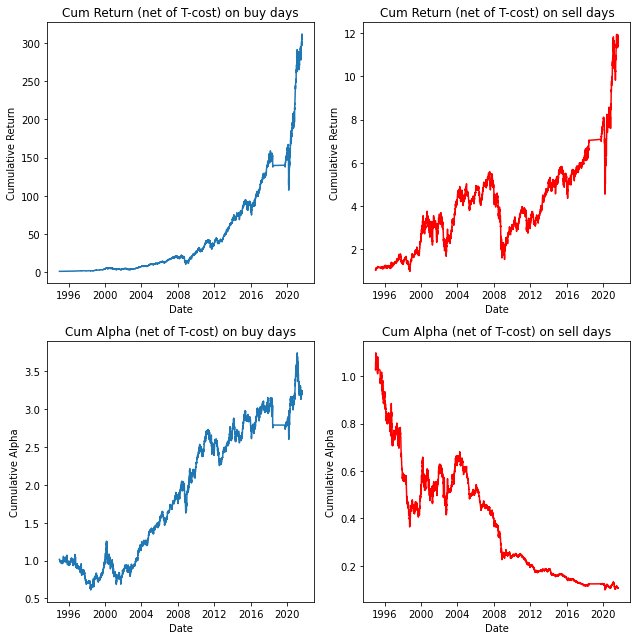

In [20]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.344
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00273
Time:                        19:58:42   Log-Likelihood:                 16834.
No. Observations:                6297   AIC:                        -3.365e+04
Df Residuals:                    6290   BIC: 

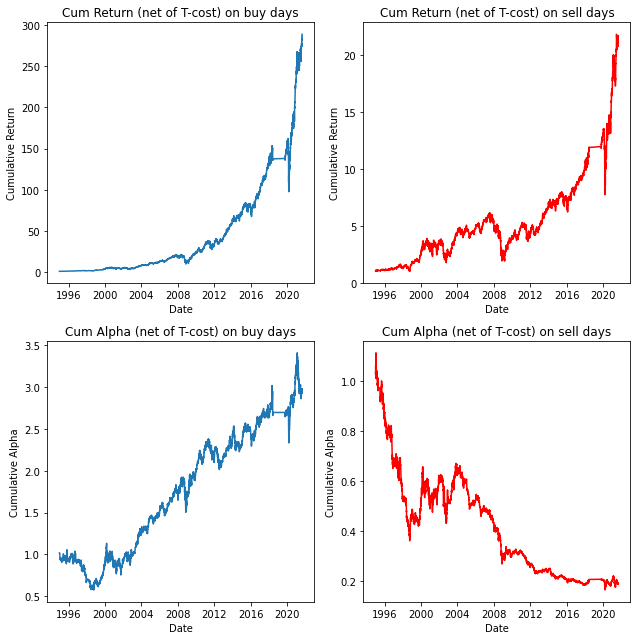

In [21]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.774
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000938
Time:                        19:59:25   Log-Likelihood:                 16986.
No. Observations:                6323   AIC:                        -3.396e+04
Df Residuals:                    6316   BIC: 

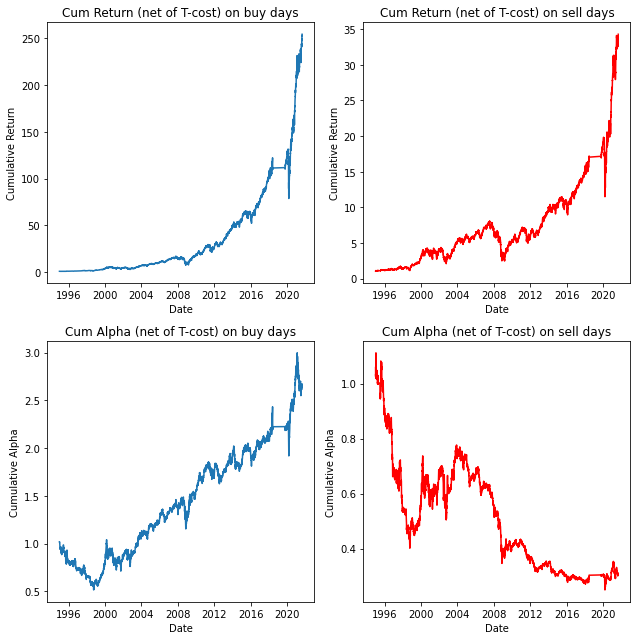

In [22]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now let's trade on moves in saleshigha1

In [23]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['saleshigha2'].notna()].reset_index(drop=True).copy()

data['buy_tomorrow'] = np.where(data['saleshigha2'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['saleshigha2'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  30103
Total number of Sells:  31418
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  191  problems for buying

There are  109  problems for selling
Total number of Buys:  29912
Total number of Sells:  31309

There are  416  problems for buying

There are  268  problems for selling
Total number of Buys:  353960
Total number of Sells:  288206

There are  343  problems for buying

There are  235  problems for selling
Total number of Buys:  280850
Total number of Sells:  229462

There are  279  problems for buying

There are  190  problems for selling
Total number of Buys:  201706
Total number of Sells:  166853

There are  189  problems for buying

There are  141  problems for selling
Total number of Buys:  114775
Total number of Sells:  98785

There are  2  problems for buying

There are  2  problems for selling
Total number of Buys:  29893
Total number of Sells:  31290



There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  4  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8649
Date:                Sat, 04 Dec 2021   Prob (F-statistic):              0.520
Time:                        20:00:56   Log-Likelihood:                 11015.
No. Observations:                5043   AIC:                        -2.202e+04
Df Residuals:                    5036   BIC: 

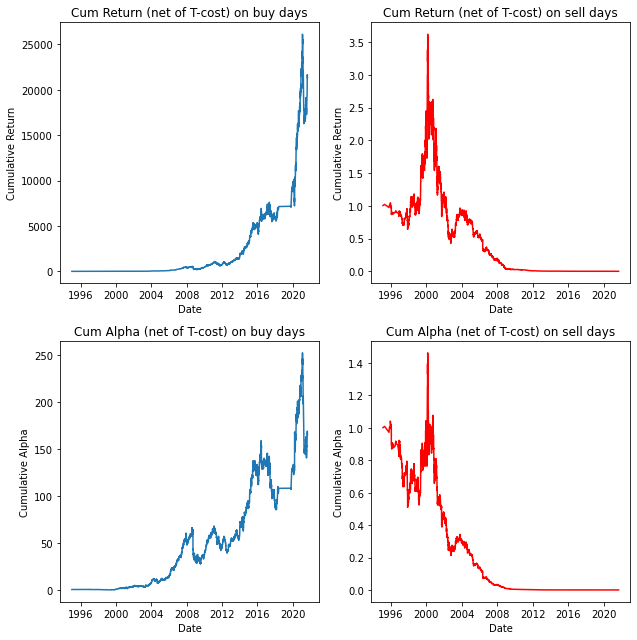

In [24]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4940
Date:                Sat, 04 Dec 2021   Prob (F-statistic):              0.813
Time:                        20:01:18   Log-Likelihood:                 14963.
No. Observations:                5888   AIC:                        -2.991e+04
Df Residuals:                    5881   BIC: 

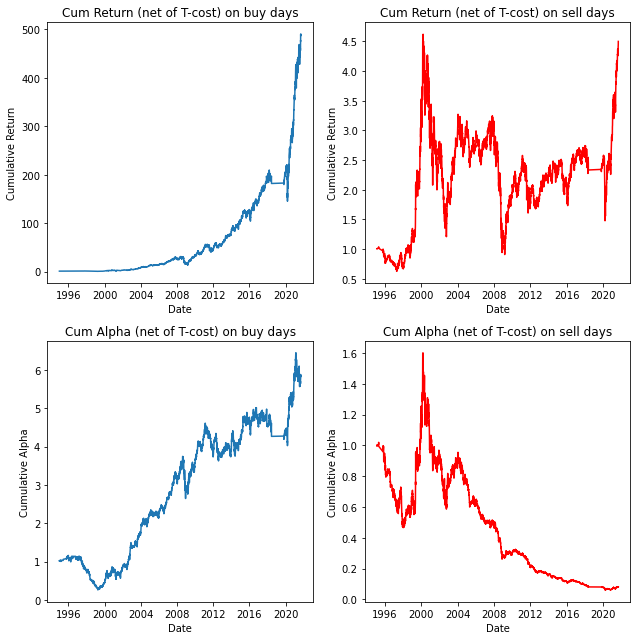

In [25]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.715
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0124
Time:                        20:01:40   Log-Likelihood:                 15811.
No. Observations:                6056   AIC:                        -3.161e+04
Df Residuals:                    6049   BIC: 

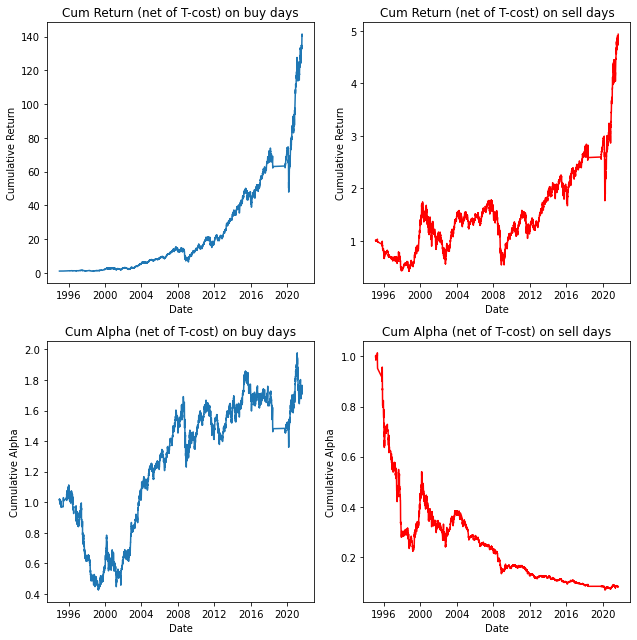

In [26]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.558
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0178
Time:                        20:02:04   Log-Likelihood:                 16102.
No. Observations:                6128   AIC:                        -3.219e+04
Df Residuals:                    6121   BIC: 

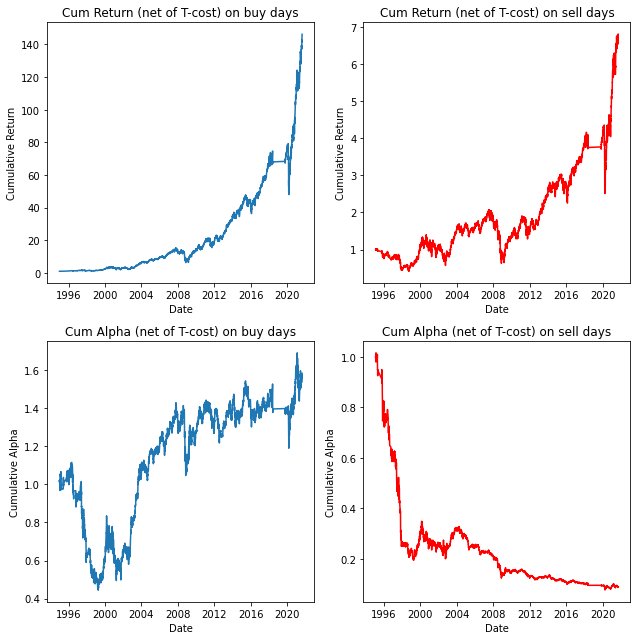

In [27]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  4  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.811
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00986
Time:                        20:02:29   Log-Likelihood:                 16285.
No. Observations:                6168   AIC:                        -3.256e+04
Df Residuals:                    6161   BIC: 

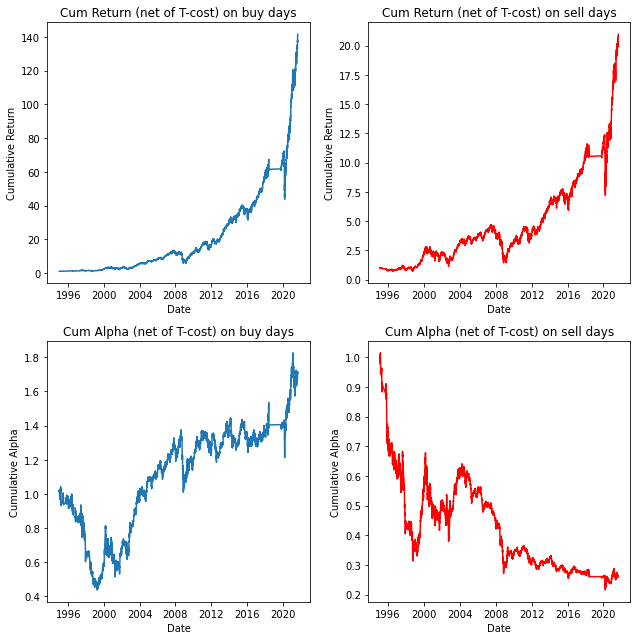

In [28]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now let's trade on moves in saleslowa1

In [29]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['saleslowa2'].notna()].reset_index(drop=True).copy()

data['buy_tomorrow'] = np.where(data['saleslowa2'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['saleslowa2'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  29226
Total number of Sells:  32344
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  159  problems for buying

There are  149  problems for selling
Total number of Buys:  29067
Total number of Sells:  32195

There are  331  problems for buying

There are  347  problems for selling
Total number of Buys:  346953
Total number of Sells:  293314

There are  276  problems for buying

There are  293  problems for selling
Total number of Buys:  274299
Total number of Sells:  235026

There are  218  problems for buying

There are  239  problems for selling
Total number of Buys:  196423
Total number of Sells:  171832

There are  158  problems for buying

There are  182  problems for selling
Total number of Buys:  111565
Total number of Sells:  102011

There are  3  problems for buying

There are  2  problems for selling
Total number of Buys:  29047
Total number of Sells:  32172



There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.743
Date:                Sat, 04 Dec 2021   Prob (F-statistic):              0.107
Time:                        20:03:57   Log-Likelihood:                 10908.
No. Observations:                4970   AIC:                        -2.180e+04
Df Residuals:                    4963   BIC: 

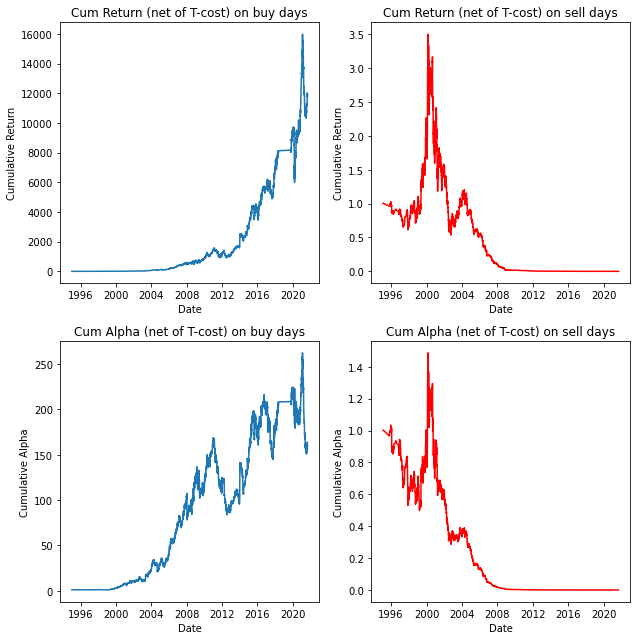

In [30]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  3  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6931
Date:                Sat, 04 Dec 2021   Prob (F-statistic):              0.655
Time:                        20:04:20   Log-Likelihood:                 14800.
No. Observations:                5843   AIC:                        -2.959e+04
Df Residuals:                    5836   BIC: 

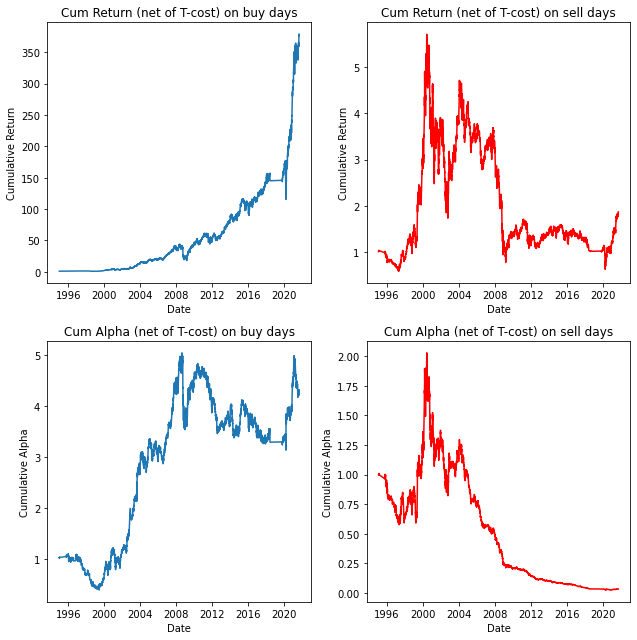

In [31]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.378
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0269
Time:                        20:04:43   Log-Likelihood:                 15684.
No. Observations:                6011   AIC:                        -3.135e+04
Df Residuals:                    6004   BIC: 

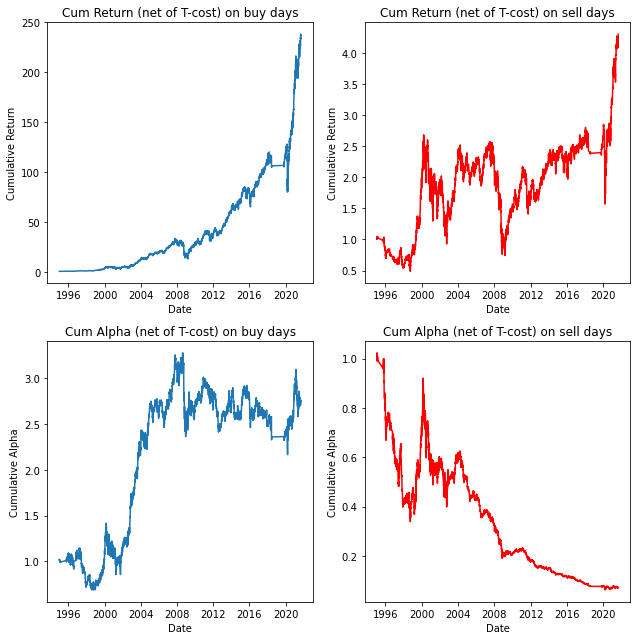

In [32]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.238
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0369
Time:                        20:05:06   Log-Likelihood:                 15946.
No. Observations:                6070   AIC:                        -3.188e+04
Df Residuals:                    6063   BIC: 

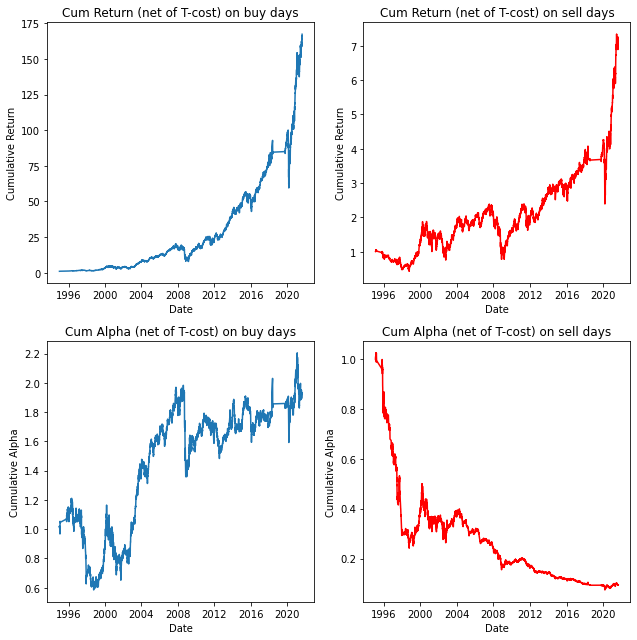

In [33]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.438
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0235
Time:                        20:05:32   Log-Likelihood:                 16156.
No. Observations:                6113   AIC:                        -3.230e+04
Df Residuals:                    6106   BIC: 

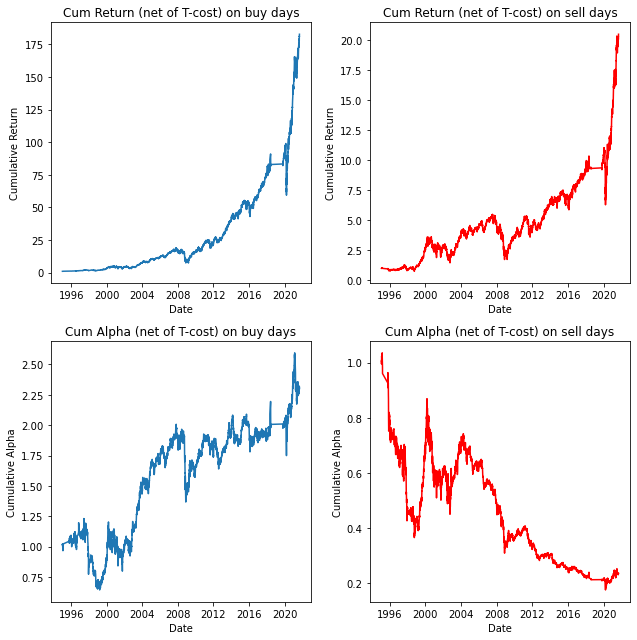

In [34]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now let's trade on BOTH saleshigha1 & saleslowa1

In [35]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['saleslowa2'].notna()].reset_index(drop=True).copy()
data = data[data['saleshigha2'].notna()].reset_index(drop=True).copy()

data['midpoint_sales_estimate'] = (data['saleslowa2'] + data['saleshigha2']) / 2

data = data[data['midpoint_sales_estimate'].notna()].reset_index(drop=True).copy()

data['buy_tomorrow'] = np.where(data['midpoint_sales_estimate'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['midpoint_sales_estimate'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  39004
Total number of Sells:  41113
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  225  problems for buying

There are  163  problems for selling
Total number of Buys:  38779
Total number of Sells:  40950

There are  524  problems for buying

There are  421  problems for selling
Total number of Buys:  443408
Total number of Sells:  389566

There are  436  problems for buying

There are  368  problems for selling
Total number of Buys:  357590
Total number of Sells:  316089

There are  352  problems for buying

There are  306  problems for selling
Total number of Buys:  260994
Total number of Sells:  233659

There are  247  problems for buying

There are  232  problems for selling
Total number of Buys:  150014
Total number of Sells:  138321

There are  3  problems for buying

There are  3  problems for selling
Total number of Buys:  38757
Total number of Sells:  40922



There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.140
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0458
Time:                        20:07:12   Log-Likelihood:                 11630.
No. Observations:                5241   AIC:                        -2.325e+04
Df Residuals:                    5234   BIC: 

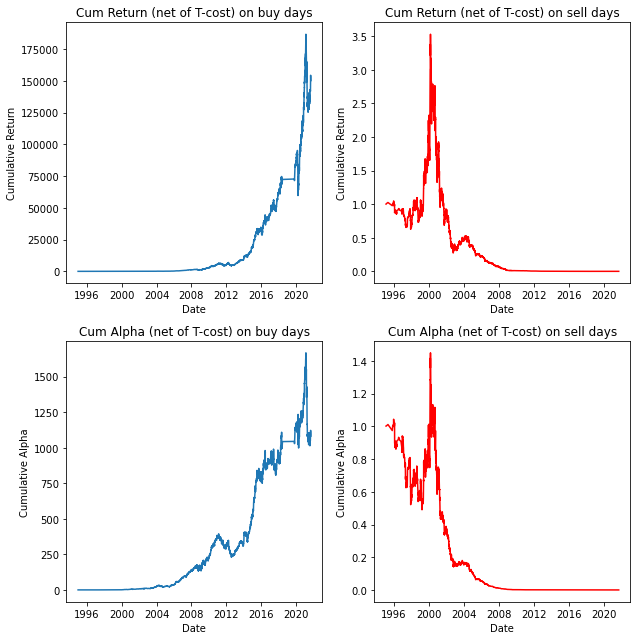

In [36]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  3  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.389
Date:                Sat, 04 Dec 2021   Prob (F-statistic):              0.215
Time:                        20:07:32   Log-Likelihood:                 15180.
No. Observations:                5918   AIC:                        -3.035e+04
Df Residuals:                    5911   BIC: 

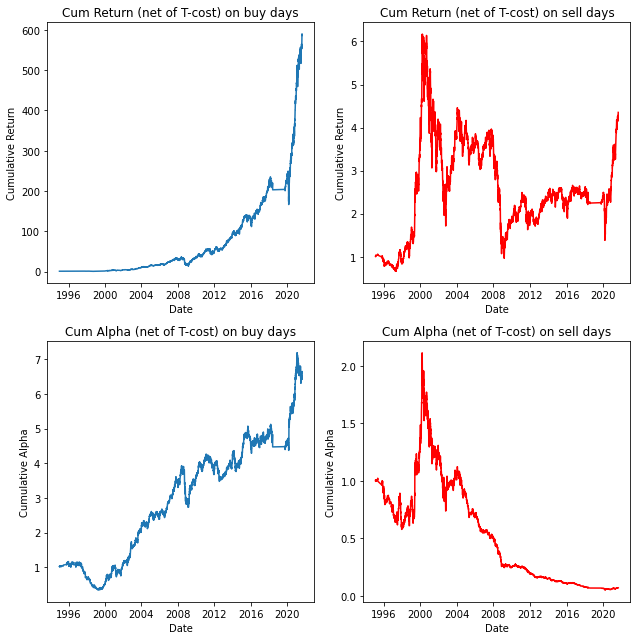

In [37]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.869
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00859
Time:                        20:07:58   Log-Likelihood:                 15842.
No. Observations:                6071   AIC:                        -3.167e+04
Df Residuals:                    6064   BIC: 

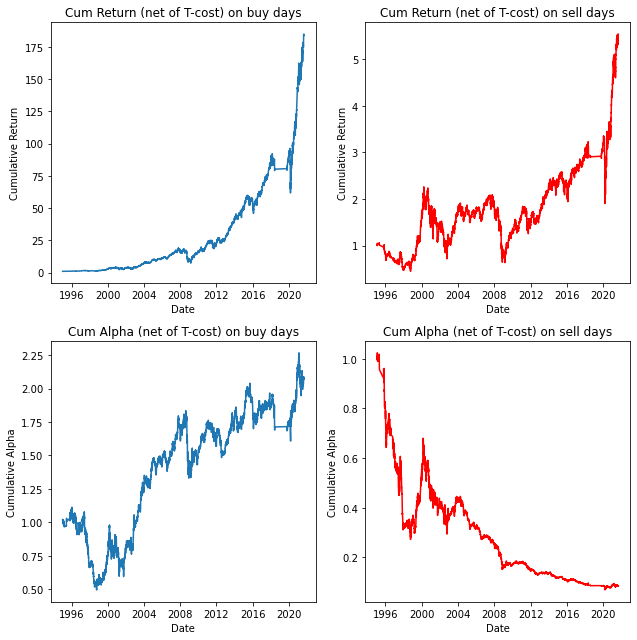

In [38]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  3  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.519
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0195
Time:                        20:08:24   Log-Likelihood:                 16109.
No. Observations:                6137   AIC:                        -3.220e+04
Df Residuals:                    6130   BIC: 

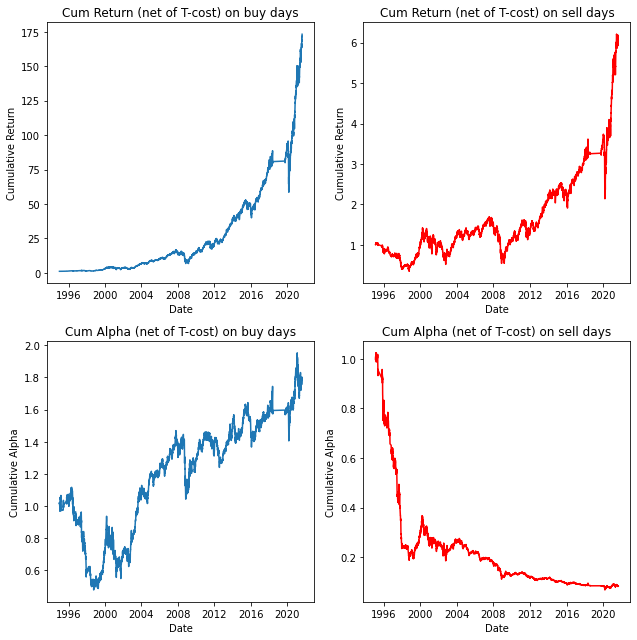

In [39]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.666
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0139
Time:                        20:08:54   Log-Likelihood:                 16299.
No. Observations:                6182   AIC:                        -3.258e+04
Df Residuals:                    6175   BIC: 

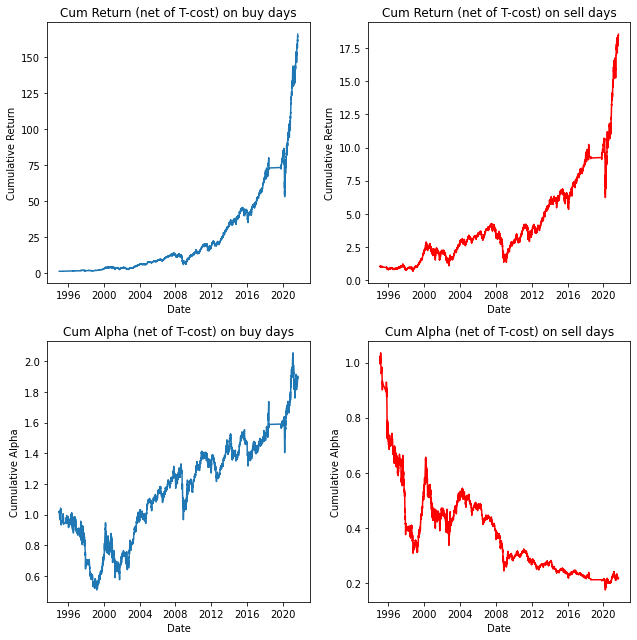

In [40]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now let's trade on moves in cfpshigha1

In [41]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['cfpshigha2'].notna()].reset_index(drop=True).copy()

data['buy_tomorrow'] = np.where(data['cfpshigha2'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['cfpshigha2'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  21483
Total number of Sells:  24124
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  171  problems for buying

There are  137  problems for selling
Total number of Buys:  21312
Total number of Sells:  23987

There are  331  problems for buying

There are  350  problems for selling
Total number of Buys:  244012
Total number of Sells:  210230

There are  280  problems for buying

There are  290  problems for selling
Total number of Buys:  193101
Total number of Sells:  167942

There are  231  problems for buying

There are  234  problems for selling
Total number of Buys:  138651
Total number of Sells:  122672

There are  165  problems for buying

There are  160  problems for selling
Total number of Buys:  79620
Total number of Sells:  73576

There are  3  problems for buying

There are  1  problems for selling
Total number of Buys:  21293
Total number of Sells:  23977



There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.446
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0231
Time:                        20:10:00   Log-Likelihood:                 10085.
No. Observations:                4519   AIC:                        -2.016e+04
Df Residuals:                    4512   BIC: 

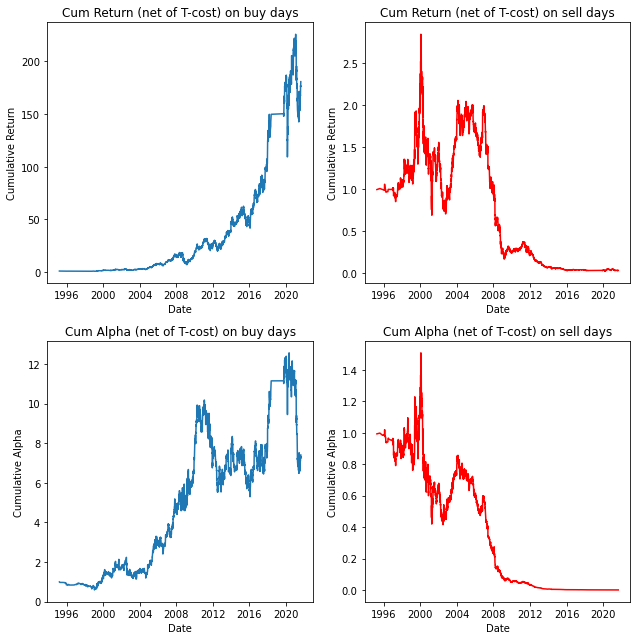

In [42]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.550
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0182
Time:                        20:10:17   Log-Likelihood:                 14664.
No. Observations:                5710   AIC:                        -2.931e+04
Df Residuals:                    5703   BIC: 

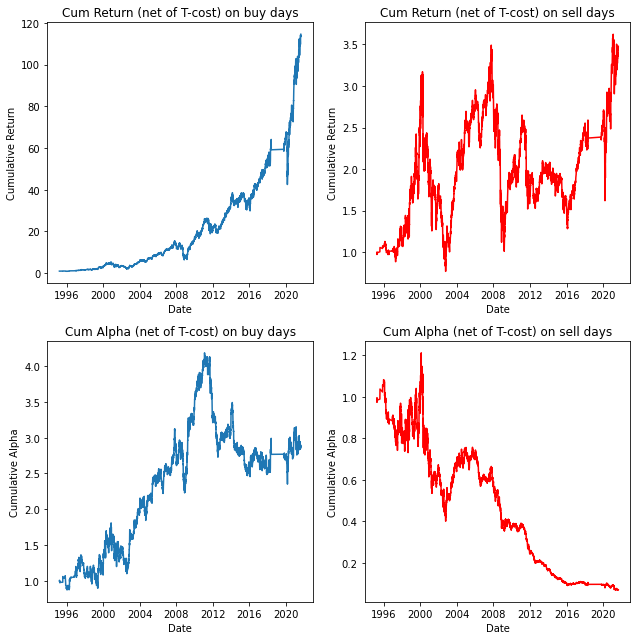

In [43]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.491
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00190
Time:                        20:10:38   Log-Likelihood:                 15547.
No. Observations:                5937   AIC:                        -3.108e+04
Df Residuals:                    5930   BIC: 

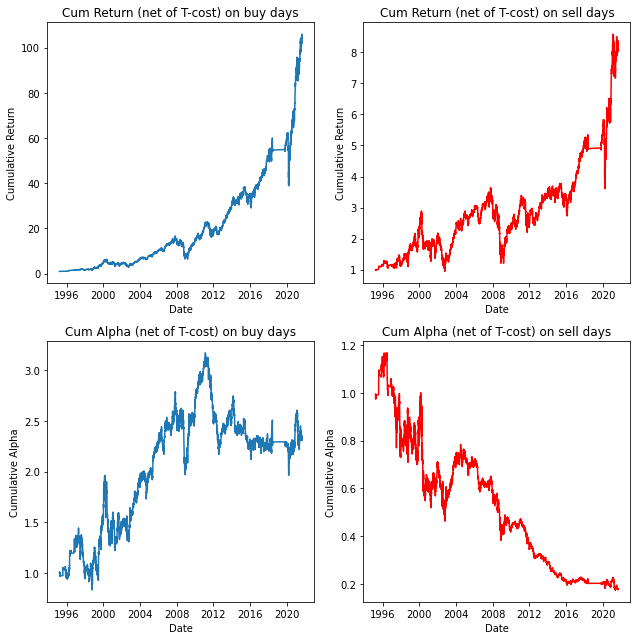

In [44]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.578
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00153
Time:                        20:11:00   Log-Likelihood:                 16156.
No. Observations:                6028   AIC:                        -3.230e+04
Df Residuals:                    6021   BIC: 

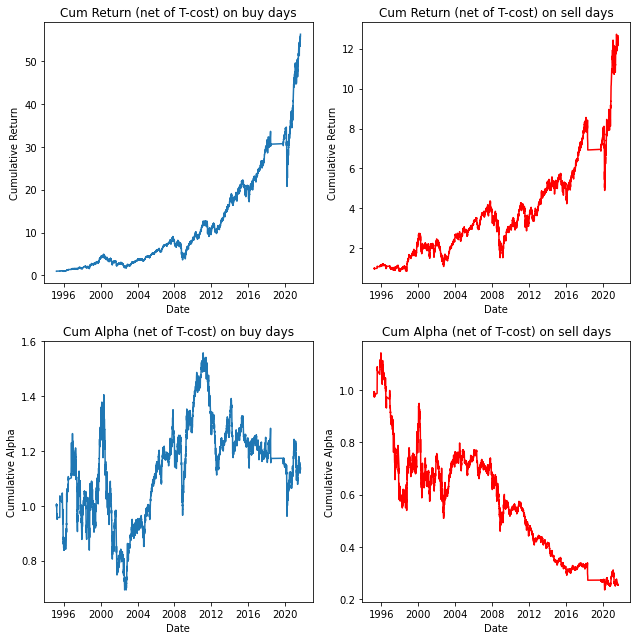

In [45]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     4.719
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           8.40e-05
Time:                        20:11:22   Log-Likelihood:                 16385.
No. Observations:                6079   AIC:                        -3.276e+04
Df Residuals:                    6072   BIC: 

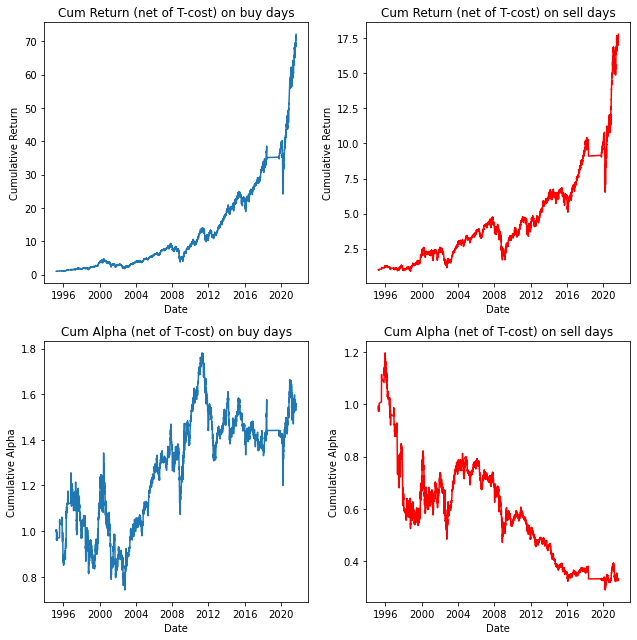

In [46]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now let's trade on moves in cfpslowa1

In [47]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['cfpslowa2'].notna()].reset_index(drop=True).copy()

data['buy_tomorrow'] = np.where(data['cfpslowa2'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['cfpslowa2'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  20854
Total number of Sells:  24442
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  156  problems for buying

There are  152  problems for selling
Total number of Buys:  20698
Total number of Sells:  24290

There are  346  problems for buying

There are  364  problems for selling
Total number of Buys:  234821
Total number of Sells:  216919

There are  289  problems for buying

There are  299  problems for selling
Total number of Buys:  185615
Total number of Sells:  173512

There are  233  problems for buying

There are  235  problems for selling
Total number of Buys:  133249
Total number of Sells:  126711

There are  169  problems for buying

There are  165  problems for selling
Total number of Buys:  76677
Total number of Sells:  75714

There are  3  problems for buying

There are  1  problems for selling
Total number of Buys:  20680
Total number of Sells:  24278



There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.179
Date:                Sat, 04 Dec 2021   Prob (F-statistic):              0.314
Time:                        20:12:28   Log-Likelihood:                 10159.
No. Observations:                4532   AIC:                        -2.030e+04
Df Residuals:                    4525   BIC: 

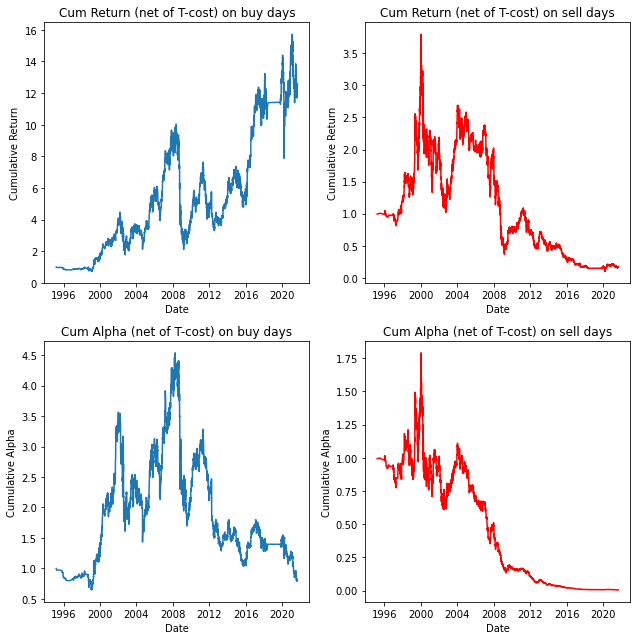

In [48]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.453
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0227
Time:                        20:12:44   Log-Likelihood:                 14657.
No. Observations:                5705   AIC:                        -2.930e+04
Df Residuals:                    5698   BIC: 

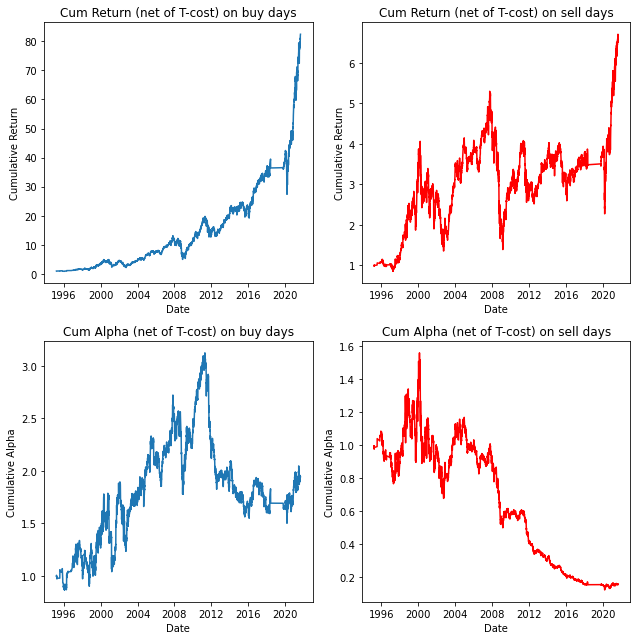

In [49]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.013
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00610
Time:                        20:13:10   Log-Likelihood:                 15568.
No. Observations:                5904   AIC:                        -3.112e+04
Df Residuals:                    5897   BIC: 

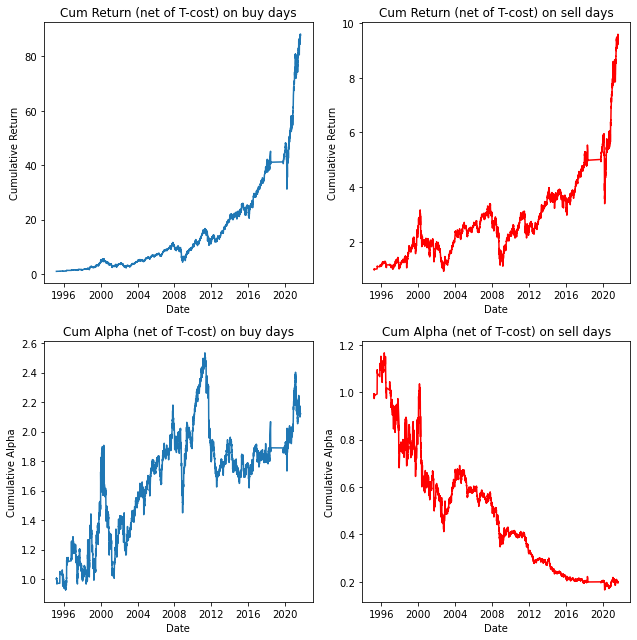

In [50]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.273
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00325
Time:                        20:13:33   Log-Likelihood:                 16085.
No. Observations:                5996   AIC:                        -3.216e+04
Df Residuals:                    5989   BIC: 

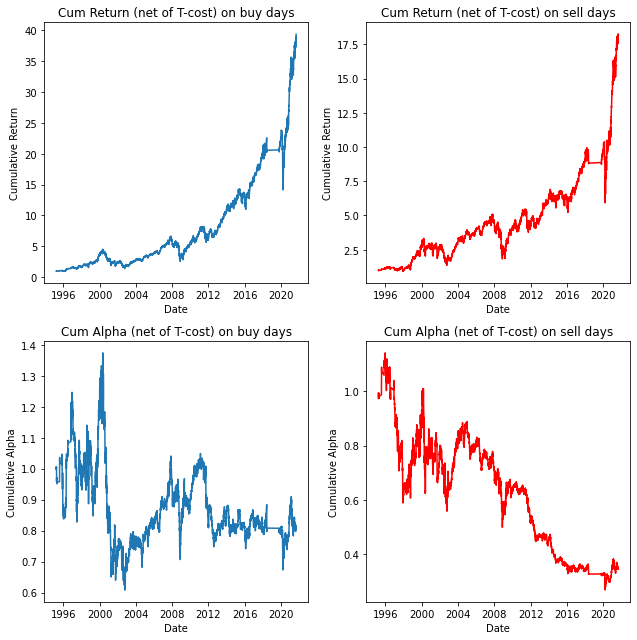

In [51]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  4  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  4  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.280
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000260
Time:                        20:13:55   Log-Likelihood:                 16329.
No. Observations:                6059   AIC:                        -3.264e+04
Df Residuals:                    6052   BIC: 

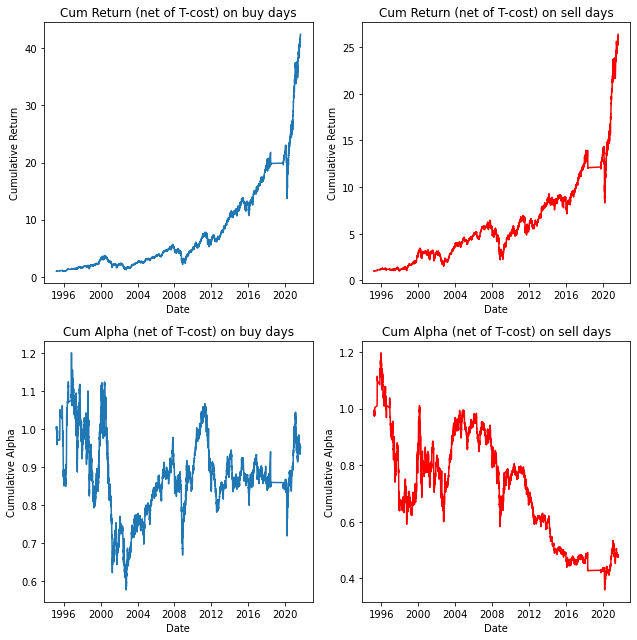

In [52]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now let's trade on BOTH cfpshigha1 & cfpslowa1

In [53]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['cfpshigha2'].notna()].reset_index(drop=True).copy()
data = data[data['cfpslowa2'].notna()].reset_index(drop=True).copy()

data['midpoint_cfps_estimate'] = (data['cfpslowa2'] + data['cfpshigha2']) / 2

data = data[data['midpoint_cfps_estimate'].notna()].reset_index(drop=True).copy()

data['buy_tomorrow'] = np.where(data['midpoint_cfps_estimate'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['midpoint_cfps_estimate'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  25688
Total number of Sells:  29026
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  199  problems for buying

There are  170  problems for selling
Total number of Buys:  25489
Total number of Sells:  28856

There are  420  problems for buying

There are  445  problems for selling
Total number of Buys:  288715
Total number of Sells:  265956

There are  354  problems for buying

There are  374  problems for selling
Total number of Buys:  231046
Total number of Sells:  214822

There are  297  problems for buying

There are  301  problems for selling
Total number of Buys:  167545
Total number of Sells:  157982

There are  213  problems for buying

There are  205  problems for selling
Total number of Buys:  96452
Total number of Sells:  93931

There are  3  problems for buying

There are  1  problems for selling
Total number of Buys:  25469
Total number of Sells:  28842



There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.449
Date:                Sat, 04 Dec 2021   Prob (F-statistic):              0.192
Time:                        20:15:13   Log-Likelihood:                 10828.
No. Observations:                4767   AIC:                        -2.164e+04
Df Residuals:                    4760   BIC: 

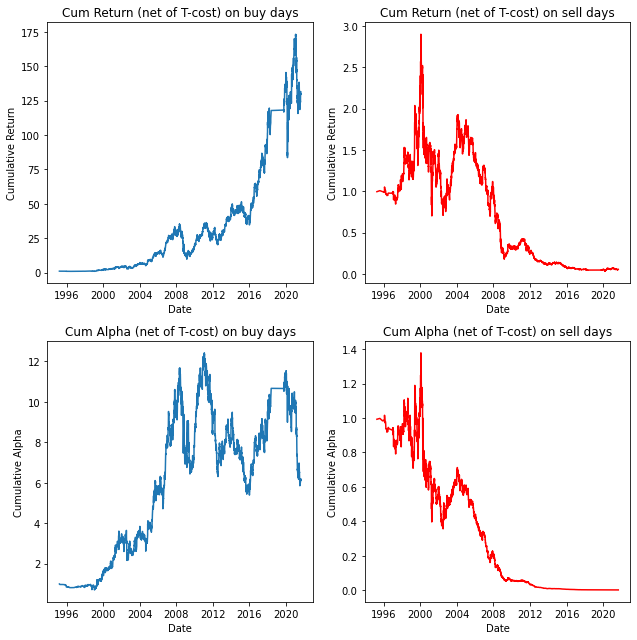

In [54]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  3  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.797
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0102
Time:                        20:15:28   Log-Likelihood:                 14987.
No. Observations:                5781   AIC:                        -2.996e+04
Df Residuals:                    5774   BIC: 

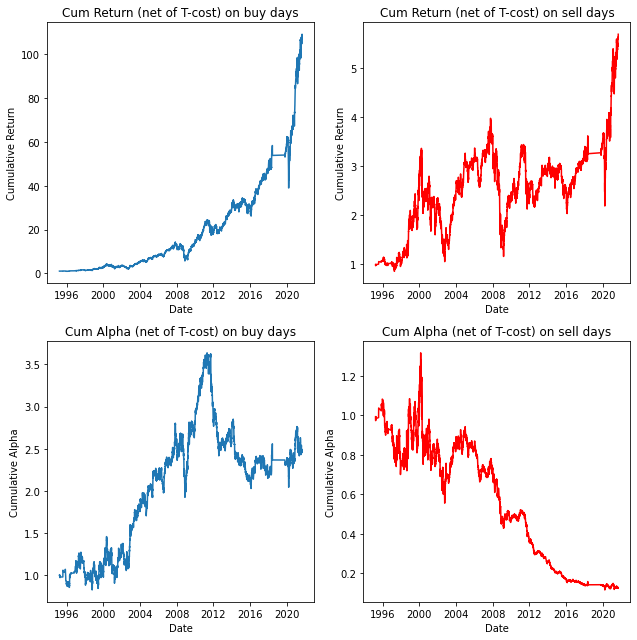

In [55]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.411
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00232
Time:                        20:15:48   Log-Likelihood:                 15798.
No. Observations:                5965   AIC:                        -3.158e+04
Df Residuals:                    5958   BIC: 

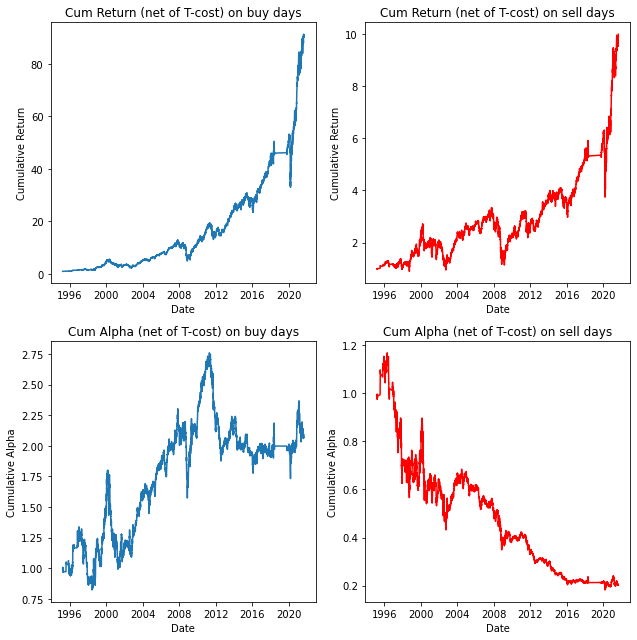

In [56]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.392
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00243
Time:                        20:16:10   Log-Likelihood:                 16216.
No. Observations:                6041   AIC:                        -3.242e+04
Df Residuals:                    6034   BIC: 

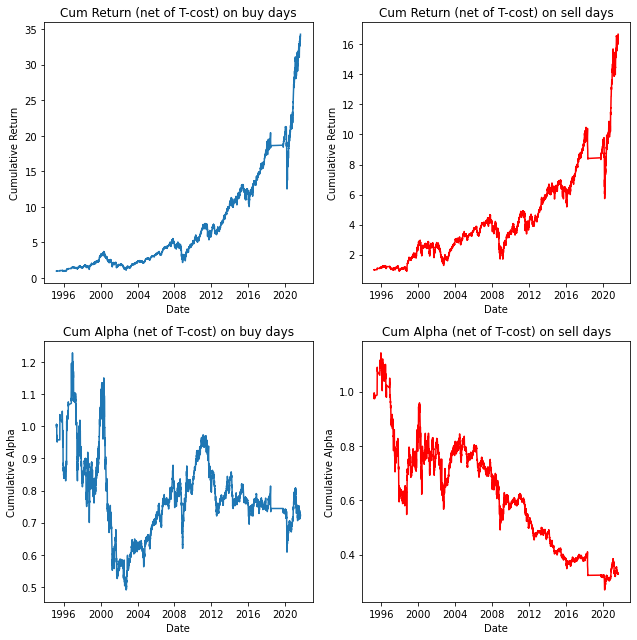

In [57]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.388
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000197
Time:                        20:16:36   Log-Likelihood:                 16415.
No. Observations:                6086   AIC:                        -3.282e+04
Df Residuals:                    6079   BIC: 

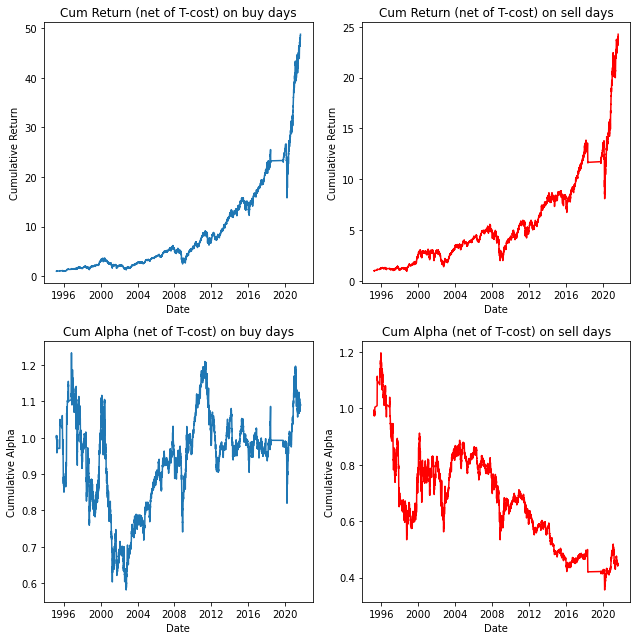

In [58]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)